# Final Project - Jeremy - Level Classification of English Learner Texts

In [1]:
# Mount Google Drive
# from google.colab import drive
# drive.mount('/content/drive/')

In [2]:
# Import libraries
import pandas as pd
import os
from bs4 import BeautifulSoup as bs
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Define file paths
pelic_path = 'data/'
cefr_labelled_path = 'data/cefr-asag-dataset-1.0.1/corpus/release-1.0/labelled/'
cefr_unlabelled_path = 'data/cefr-asag-dataset-1.0.1/corpus/release-1.0/unlabelled/'

## Load PELIC Data

<p>The PELIC dataset is found on GitHub, here: <a href="https://github.com/ELI-Data-Mining-Group/PELIC-dataset/">https://github.com/ELI-Data-Mining-Group/PELIC-dataset/</a></p>

<p>I still have a lot of information on this GitHub to go through to get all of the information that I need. For now, I have loaded the main compiled CSV.</p>

In [4]:
pelic = pd.read_csv(pelic_path + 'PELIC_compiled.txt')

In [5]:
pelic.head()

,answer_id,anon_id,L1,gender,semester,placement_test,course_id,level_id,class_id,question_id,version,text_len,text,tokens,tok_lem_POS
0,1,eq0,Arabic,Male,2006_fall,NaN,149,4,g,5,1,177,I met my friend Nife while I was studying in a...,"['I', 'met', 'my', 'friend', 'Nife', 'while', ...","[('I', 'I', 'PRP'), ('met', 'meet', 'VBD'), ('..."
1,2,am8,Thai,Female,2006_fall,NaN,149,4,g,5,1,137,"Ten years ago, I met a women on the train betw...","['Ten', 'years', 'ago', ',', 'I', 'met', 'a', ...","[('Ten', 'ten', 'CD'), ('years', 'year', 'NNS'..."
2,3,dk5,Turkish,Female,2006_fall,NaN,115,4,w,12,1,63,In my country we usually don't use tea bags. F...,"['In', 'my', 'country', 'we', 'usually', 'do',...","[('In', 'in', 'IN'), ('my', 'my', 'PRP$'), ('c..."
3,4,dk5,Turkish,Female,2006_fall,NaN,115,4,w,13,1,6,I organized the instructions by time.,"['I', 'organized', 'the', 'instructions', 'by'...","[('I', 'I', 'PRP'), ('organized', 'organize', ..."
4,5,ad1,Korean,Female,2006_fall,NaN,115,4,w,12,1,59,"First, prepare a port, loose tea, and cup.\nSe...","['First', ',', 'prepare', 'a', 'port', ',', 'l...","[('First', 'first', 'RB'), (',', ',', ','), ('..."


In [6]:
pelic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46204 entries, 0 to 46203
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   answer_id       46204 non-null  int64  
 1   anon_id         46204 non-null  object 
 2   L1              46204 non-null  object 
 3   gender          46204 non-null  object 
 4   semester        46204 non-null  object 
 5   placement_test  23563 non-null  float64
 6   course_id       46204 non-null  int64  
 7   level_id        46204 non-null  int64  
 8   class_id        46204 non-null  object 
 9   question_id     46204 non-null  int64  
 10  version         46204 non-null  int64  
 11  text_len        46204 non-null  int64  
 12  text            46201 non-null  object 
 13  tokens          46204 non-null  object 
 14  tok_lem_POS     46204 non-null  object 
dtypes: float64(1), int64(6), object(8)
memory usage: 5.3+ MB


In [7]:
pelic.describe()

,answer_id,placement_test,course_id,level_id,question_id,version,text_len
count,46204.000000,23563.000000,46204.000000,46204.000000,46204.000000,46204.000000,46204.000000
mean,24277.193576,58.868650,504.587893,4.031188,3184.517877,1.112501,91.241126
std,13967.355597,13.949785,255.209544,0.858291,1756.716471,0.353671,155.427213
min,1.000000,20.000000,96.000000,2.000000,1.000000,1.000000,0.000000
25%,12217.750000,47.000000,276.000000,3.000000,1773.000000,1.000000,9.000000
50%,24207.500000,58.000000,508.000000,4.000000,3162.000000,1.000000,23.000000
75%,36438.250000,70.000000,672.000000,5.000000,4732.000000,1.000000,114.000000
max,48420.000000,90.000000,1068.000000,5.000000,6139.000000,3.000000,2432.000000


In [8]:
pelic.shape

(46204, 15)

<p>The levels in this dataset range from A2 to B2:</p>
<ul>
    <li>2 = A2</li>
    <li>3 = B1</li>
    <li>4 = B2</li>
    <li>5 = C1</li>
</ul>

<Axes: >

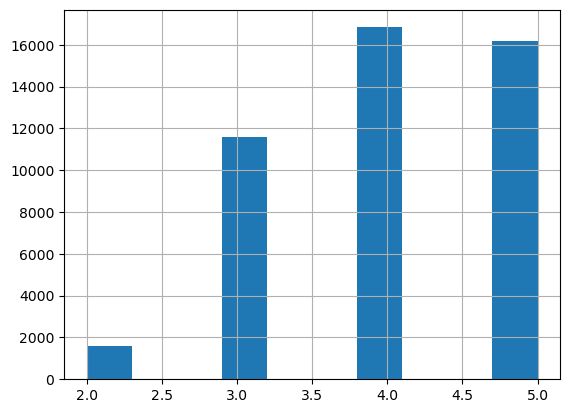

In [9]:
pelic.level_id.hist()

In [10]:
pelic.level_id.value_counts()

level_id
4    16836
5    16190
3    11607
2     1571
Name: count, dtype: int64

In [11]:
pelic.question_id.value_counts()

question_id
3437    44
2281    41
5530    37
5533    37
4304    36
        ..
648      1
649      1
178      1
650      1
424      1
Name: count, Length: 4545, dtype: int64

In [12]:
pelic.L1.value_counts()

L1
Arabic               16831
Korean                9208
Chinese               8503
Japanese              2782
Spanish               1909
Turkish               1537
Thai                  1376
Taiwanese              678
Portuguese             603
Other                  493
French                 477
Italian                393
Russian                193
Hebrew                 189
English                154
Farsi                  144
Mongol                 144
Vietnamese             104
German                  85
Indonesian              71
Romanian                69
Russian,Ukrainian       62
Azerbaijani             45
Suundi                  41
Swedish                 31
Montenegrin             27
Zulu                    25
Polish                  20
Hindi                    6
Swahili                  4
Name: count, dtype: int64

## Load CEFR Data

<p>The CEFR dataset is found here: <a href="https://cental.uclouvain.be/team/atack/cefr-asag/">https://cental.uclouvain.be/team/atack/cefr-asag/</a></p>

<p>I've extracted the data from the XML files into two dataframes: One for the labelled data and the other for the unlabelled data.</p>

<p>The next step will be to combine the PELIC and CEFR datasets.</p>

In [13]:
# Create a function that reads the CEFR data from the XML files into a Pandas DataFrame
def create_cefr_df(path):
    '''
    This function reads the CEFR data
    from XML files in the directory
    to a Pandas DataFrame
    '''

    # Define DataFrame columns
    df_columns = ['file_name', 'age_participant','sex_participant', 'education', 'L1', 'sex_examiner1', 'sex_examiner2', 'sex_examiner3', 'setting', 'question', 'word_limit', 'level', 'answer', 'grade_examiner1', 'grade_examiner2', 'grade_examiner3', 'grade_majority_vote']

    # Create an empty list to store dictionaries
    all_data = []

    # Loop through XML files in the directory
    for filename in os.listdir(path):
        if filename.endswith('.xml'):
            file_path = os.path.join(path, filename)

            # Read XML file
            with open(file_path, 'r') as file:
                contents = file.read()

            # Parse XML
            soup = bs(contents, 'xml')

            # Extract data from XML
            age_participant = soup.find('person', {'role': 'participant'})
            sex_participant = age_participant.get('sex') if age_participant else None
            age_participant = age_participant.get('age') if age_participant else None
            education = soup.find('education').get('type') if soup.find('education') else None
            L1 = soup.find('langKnown').get('tag') if soup.find('langKnown') else None
            sex_examiner1 = soup.find('person', {'xml:id': 'examiner.1'}).get('sex') if soup.find('person', {'xml:id': 'examiner.1'}) else None
            sex_examiner2 = soup.find('person', {'xml:id': 'examiner.2'}).get('sex') if soup.find('person', {'xml:id': 'examiner.2'}) else None
            sex_examiner3 = soup.find('person', {'xml:id': 'examiner.3'}).get('sex') if soup.find('person', {'xml:id': 'examiner.3'}) else None
            setting = soup.find('settingDesc').find('p').text if soup.find('settingDesc') else None
            question = soup.find('div', {'type': 'question'}).find('p').text if soup.find('div', {'type': 'question'}) else None
            word_limit = soup.find('note', {'type': 'word-limit'}).text if soup.find('note', {'type': 'word-limit'}) else None
            level = soup.find('label', {'type': 'level'}).find('span').text if soup.find('label', {'type': 'level'}) else None
            answer = soup.find('div', {'type': 'answer'}).find('p').text if soup.find('div', {'type': 'answer'}) else None
            grade_examiner1 = soup.find('label', {'corresp': '#examiner.1'}).find('span').text if soup.find('label', {'corresp': '#examiner.1'}) else None
            grade_examiner2 = soup.find('label', {'corresp': '#examiner.2'}).find('span').text if soup.find('label', {'corresp': '#examiner.2'}) else None
            grade_examiner3 = soup.find('label', {'corresp': '#examiner.3'}).find('span').text if soup.find('label', {'corresp': '#examiner.3'}) else None
            grade_majority_vote = soup.find('label', {'subtype': 'majority-vote'}).find('span').text if soup.find('label', {'subtype': 'majority-vote'}) else None

            # Append data to list as a dictionary
            all_data.append({
                'file_name': filename,
                'age_participant': age_participant,
                'sex_participant': sex_participant,
                'education': education,
                'L1': L1,
                'sex_examiner1': sex_examiner1,
                'sex_examiner2': sex_examiner2,
                'sex_examiner3': sex_examiner3,
                'setting': setting,
                'question': question,
                'word_limit': word_limit,
                'level': level,
                'answer': answer,
                'grade_examiner1': grade_examiner1,
                'grade_examiner2': grade_examiner2,
                'grade_examiner3': grade_examiner3,
                'grade_majority_vote': grade_majority_vote
            })

    # Create DataFrame from the list of dictionaries
    df_all = pd.DataFrame(all_data)

    return df_all

### CEFR Labelled Data

In [14]:
# Call the function and display the resulting DataFrame
cefr_labelled = create_cefr_df(cefr_labelled_path)
cefr_labelled.head()

,file_name,age_participant,sex_participant,education,L1,sex_examiner1,sex_examiner2,sex_examiner3,setting,question,word_limit,level,answer,grade_examiner1,grade_examiner2,grade_examiner3,grade_majority_vote
0,0001.xml,18,M,higher-secondary,fr,F,F,F,collected in a university-level language learn...,What are your daily habits? What time do you g...,(at least 30 words),A1,everyday i get up at 8 a clock. I always turn ...,A1,A2,A2,A2
1,0002.xml,19,F,higher-secondary,fr,F,F,F,collected in a university-level language learn...,Describe your family.,(at least 30 words),A1,My family is very small. I have a big borther....,A1,A1,A1,A1
2,0003.xml,22,F,lower-secondary,fr,F,F,F,collected in a university-level language learn...,Describe your family.,(at least 30 words),A1,My name is {name},A1,A1,A1,A1
3,0004.xml,21,F,higher-secondary,fr,F,F,F,collected in a university-level language learn...,Describe your hobbies.,(at least 30 words),A1,"Hi my name is {name},",A2,A2,A2,A2
4,0005.xml,18,F,higher-secondary,fr,F,F,F,collected in a university-level language learn...,Describe your family.,(at least 30 words),A1,"I have one sister, she is married and she has ...",A2,A1,A2,A2


In [15]:
cefr_labelled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   file_name            299 non-null    object
 1   age_participant      299 non-null    object
 2   sex_participant      299 non-null    object
 3   education            299 non-null    object
 4   L1                   299 non-null    object
 5   sex_examiner1        299 non-null    object
 6   sex_examiner2        299 non-null    object
 7   sex_examiner3        299 non-null    object
 8   setting              299 non-null    object
 9   question             299 non-null    object
 10  word_limit           299 non-null    object
 11  level                299 non-null    object
 12  answer               299 non-null    object
 13  grade_examiner1      299 non-null    object
 14  grade_examiner2      299 non-null    object
 15  grade_examiner3      299 non-null    object
 16  grade_ma

In [16]:
cefr_labelled.describe()

,file_name,age_participant,sex_participant,education,L1,sex_examiner1,sex_examiner2,sex_examiner3,setting,question,word_limit,level,answer,grade_examiner1,grade_examiner2,grade_examiner3,grade_majority_vote
count,299,299,299,299,299,299,299,299,299,299,299,299,299,299,299,299,299
unique,299,58,2,6,11,1,1,1,2,16,5,6,296,6,7,6,6
top,0001.xml,21,F,higher-secondary,fr,F,F,F,collected in a university-level language learn...,What is the impact of social networks on relat...,(at least 150 words),A2,The most important factor of a healthy life,B1,B1,B1,B1
freq,1,44,184,180,279,299,299,299,154,29,77,72,3,115,119,109,113


In [17]:
cefr_labelled.shape

(299, 17)

<Axes: >

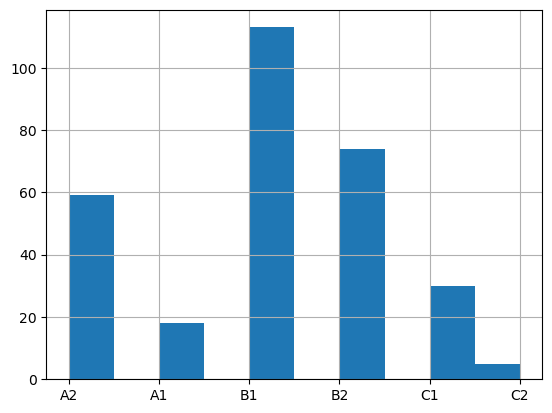

In [18]:
cefr_labelled.grade_majority_vote.hist()

In [19]:
cefr_labelled.grade_majority_vote.value_counts()

grade_majority_vote
B1    113
B2     74
A2     59
C1     30
A1     18
C2      5
Name: count, dtype: int64

In [20]:
cefr_labelled.question.value_counts()

question
What is the impact of social networks on relationships?                                                                         29
Eating a balanced diet is the most important factor for a healthy life. Explain your point of view.                             28
Do people who live in the public eye have a right to privacy? Explain your point of view.                                       20
You are invited to a friend's birthday. You respond thanking him/her. Suggest some different ways that you can help him/her.    19
What is the best book you've ever read and why?                                                                                 19
If you had 1 million euros, what would you do with it?                                                                          19
Should study abroad be a compulsory part of education? Explain your point of view.                                              19
What advice would you give to help improve the environment?               

In [21]:
cefr_labelled.L1.value_counts()

L1
fr     279
es       8
de       4
it       1
ru       1
sw       1
ar       1
kab      1
fa       1
nl       1
bg       1
Name: count, dtype: int64

### CEFR Unlabelled Data

In [22]:
# Call the function and display the resulting DataFrame
cefr_unlabelled = create_cefr_df(cefr_unlabelled_path)
cefr_unlabelled.head()

,file_name,age_participant,sex_participant,education,L1,sex_examiner1,sex_examiner2,sex_examiner3,setting,question,word_limit,level,answer,grade_examiner1,grade_examiner2,grade_examiner3,grade_majority_vote
0,0016.xml,18,M,higher-secondary,fr,None,None,None,collected in a university-level language learn...,You are invited to a friend's birthday. You re...,(at least 60 words),A2,Hi my dear friend !,None,None,None,None
1,0017.xml,19,M,higher-secondary,fr,None,None,None,collected in a university-level language learn...,"Share a memory of a holiday. Where was it, who...",(at least 60 words),A2,I will write about my holiday in Iceland. I an...,None,None,None,None
2,0018.xml,18,F,higher-secondary,fr,None,None,None,collected in a university-level language learn...,You are invited to a friend's birthday. You re...,(at least 60 words),A2,Hello {name}!!,None,None,None,None
3,0020.xml,18,F,higher-secondary,fr,None,None,None,collected in a university-level language learn...,You are invited to a friend's birthday. You re...,(at least 60 words),A2,Hi! How are you?,None,None,None,None
4,0021.xml,18,F,higher-secondary,fr,None,None,None,collected in a university-level language learn...,You are invited to a friend's birthday. You re...,(at least 60 words),A2,Hey!,None,None,None,None


In [23]:
cefr_unlabelled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 409 entries, 0 to 408
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   file_name            409 non-null    object
 1   age_participant      409 non-null    object
 2   sex_participant      409 non-null    object
 3   education            409 non-null    object
 4   L1                   409 non-null    object
 5   sex_examiner1        0 non-null      object
 6   sex_examiner2        0 non-null      object
 7   sex_examiner3        0 non-null      object
 8   setting              409 non-null    object
 9   question             409 non-null    object
 10  word_limit           409 non-null    object
 11  level                409 non-null    object
 12  answer               409 non-null    object
 13  grade_examiner1      0 non-null      object
 14  grade_examiner2      0 non-null      object
 15  grade_examiner3      0 non-null      object
 16  grade_ma

In [24]:
cefr_unlabelled.describe()

,file_name,age_participant,sex_participant,education,L1,sex_examiner1,sex_examiner2,sex_examiner3,setting,question,word_limit,level,answer,grade_examiner1,grade_examiner2,grade_examiner3,grade_majority_vote
count,409,409,409,409,409,0,0,0,409,409,409,409,409,0,0,0,0
unique,409,54,2,6,14,0,0,0,2,13,4,4,403,0,0,0,0
top,0016.xml,20,F,higher-secondary,fr,NaN,NaN,NaN,collected in a university-level language learn...,"If you had 1 million euros, what would you do ...",(at least 80 words),B1,Job is something you will have to do in your a...,NaN,NaN,NaN,NaN
freq,1,65,227,266,389,NaN,NaN,NaN,264,70,166,166,3,NaN,NaN,NaN,NaN


In [25]:
cefr_unlabelled.shape

(409, 17)

In [26]:
cefr_unlabelled.question.value_counts()

question
If you had 1 million euros, what would you do with it?                                                                          70
What is the best book you've ever read and why?                                                                                 55
Do you think it is more important to have an enjoyable job or to make money? Explain your point of view.                        47
Imagine your life in 10 years time. What will it look like?                                                                     41
You attended an event. Write an article for your blog.                                                                          41
Should study abroad be a compulsory part of education? Explain your point of view.                                              34
You are invited to a friend's birthday. You respond thanking him/her. Suggest some different ways that you can help him/her.    30
What advice would you give to help improve the environment?               

In [27]:
cefr_unlabelled.L1.value_counts()

L1
fr       389
de         6
ro         2
ru         2
es         1
ar         1
pl         1
en         1
az         1
pt         1
nl         1
bg         1
vi         1
ar_LB      1
Name: count, dtype: int64